The Metric: My metric is the length of all staircases in a neighborhood. This means how long (diagonally from first step to last step) each staircase is in a neighborhood. I believe this to be a good metric for comfortablity since most people would rather not walk up many flights of stairs.

The Data: There is a csv file that has data on a large amount of staircases within most neighborhoods in pittsburgh. Each datapoint has an extremely large amount of columns of data in them, however, so, I will be narrowing them down to just the neighborhood, the length of staircases (the main factor) and the amount of steps (a minor factor). Here is an example of how much data one datapoint has before cutting it down.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Stairframe = pd.read_csv("StairDataset.csv")
Stairframe.iloc[0:1]

,_id,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,326501686,10 Wakefield St,3rd Division,NaN,Concrete,53.0,8.0,0.0,100.0,...,South Oakland,3.0,4,42003040900,3,4,4,2-11,40.430934,-79.957093


The Major Factor: In this portion I went through the cut down dataset, found the sums of all the stair lengths in each neighborhood, sorted that dataset and found the 5 neighborhoods with the most and least sums. Below is a bargraph showing the least stair length summed neighborhoods, as those are the more relevant ones.

These are the top five highest staircase length neighborhoods
9898.0: Beechview
5881.0: Carrick
5865.0: Brookline
5409.0: Marshall-Shadeland
5408.0: Hazelwood

These are the top five lowest staircase length neighborhoods
12.0: Mount Oliver Borough
14.0: Manchester
25.0: Point Breeze North
40.0: East Liberty
60.0: Shadyside



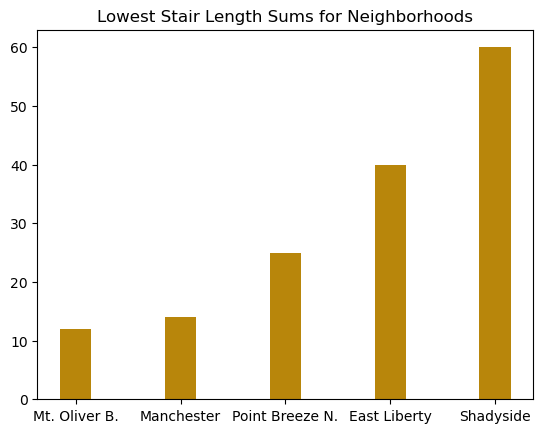

In [3]:
Stairframe = pd.read_csv("StairDataset.csv", usecols=["length", "number_of_steps","neighborhood"])
lengthdict = {}
lengthdict1 = {}
for index, row in Stairframe.iterrows():
    length = row['length']
    name = row['neighborhood']
    if name in lengthdict:
        lengthdict[name] = lengthdict[name] + length
    else:
        lengthdict[name] = length
otherlengthdict = {}
for key, value in lengthdict.items():
    if value > 0:
        otherlengthdict[value] = key
lengthdict = otherlengthdict
mykeys = list(lengthdict.keys())
mykeys.sort()
mykeys.reverse()
mykeys1 = [mykeys[0],mykeys[1],mykeys[2],mykeys[3],mykeys[4],mykeys[-1],mykeys[-2],mykeys[-3],mykeys[-4],mykeys[-5]]
lengthdict = {i: lengthdict[i] for i in mykeys1}
check = False
print("These are the top five highest staircase length neighborhoods")
for key, value in lengthdict.items():
    if key == 5408:
        print(f"{key}: {value}")
        print()
        print("These are the top five lowest staircase length neighborhoods")
    else:
        print(f"{key}: {value}")
print()
y = [12, 14, 25, 40, 60]
x = ["Mt. Oliver B.", "Manchester", "Point Breeze N.", "East Liberty", "Shadyside"]
plt.title('Lowest Stair Length Sums for Neighborhoods')
plt.bar(x, y, color='darkgoldenrod', width=0.3)
plt.show()

The Minor Factor: In this portion I went through the cut down dataset, found the sums of all the stair step amounts in each neighborhood, sorted that dataset and found the 5 neighborhoods with the most and least sums. While I am not using this factor directly, I did want to have it present as a sort of sanity check to make sure the results from the other factor make relative sense. (If the least stair length sum neighborhood had 1000 steps in it, that would mean something is wrong with the dataset) Below is a bargraph showing the least step amount summed neighborhoods, as those are the more relevant ones.

These are the top five highest staircase length neighborhoods
1215.0: Fineview
1109.0: Polish Hill
920.0: Upper Lawrenceville
867.0: Stanton Heights
804.0: Upper Hill

These are the top five lowest staircase step amount summed neighborhoods
8.0: Manchester
9.0: Mount Oliver Borough
16.0: Point Breeze North
18.0: East Liberty
23.0: Allegheny West



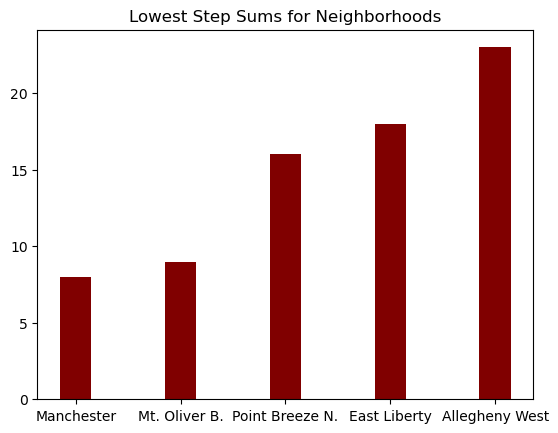

In [4]:
Stairframe = pd.read_csv("StairDataset.csv", usecols=["length", "number_of_steps","neighborhood"])
lengthdict = {}
lengthdict1 = {}
for index, row in Stairframe.iterrows():
    length = row['number_of_steps']
    name = row['neighborhood']
    if name in lengthdict:
        lengthdict[name] = lengthdict[name] + length
    else:
        lengthdict[name] = length
otherlengthdict = {}
for key, value in lengthdict.items():
    if value > 0:
        otherlengthdict[value] = key
lengthdict = otherlengthdict
mykeys = list(lengthdict.keys())
mykeys.sort()
mykeys.reverse()
mykeys1 = [mykeys[0],mykeys[1],mykeys[2],mykeys[3],mykeys[4],mykeys[-1],mykeys[-2],mykeys[-3],mykeys[-4],mykeys[-5]]
lengthdict = {i: lengthdict[i] for i in mykeys1}
print("These are the top five highest staircase length neighborhoods")
for key, value in lengthdict.items():
    if key == 804:
        print(f"{key}: {value}")
        print()
        print("These are the top five lowest staircase step amount summed neighborhoods")
    else:
        print(f"{key}: {value}")
print()
y = [8, 9, 16, 18, 23]
x = ["Manchester", "Mt. Oliver B.", "Point Breeze N.", "East Liberty", "Allegheny West"]
plt.title('Lowest Step Sums for Neighborhoods')
plt.bar(x, y, color='maroon', width=0.3)
plt.show()

Conclusion: Manchester and Mount Oliver Borough are consistently the best neighborhoods in terms of least amount of stairs and length of staircases. I considered them a tie because whether their single staircases are better or worse than the other depends on a lot of factors that aren't in this dataset, such as how steep the staircases are.